In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

# Display the first 5 rows to understand the data structure
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7812 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7812 non-null   object 
 1   Year      7812 non-null   int64  
 2   Duration  5819 non-null   object 
 3   Genre     7812 non-null   object 
 4   Rating    7812 non-null   float64
 5   Votes     7812 non-null   object 
 6   Director  7812 non-null   object 
 7   Actor 1   7707 non-null   object 
 8   Actor 2   7641 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 671.3+ KB


In [6]:
df.dropna(subset=['Name', 'Director', 'Genre', 'Rating', 'Votes'], inplace=True)

In [4]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)

In [8]:
df.dropna(subset=['Name', 'Director', 'Genre', 'Rating', 'Votes', 'Duration'], inplace=True)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)


In [9]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5819 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5819 non-null   object 
 1   Year      5819 non-null   int64  
 2   Duration  5819 non-null   int64  
 3   Genre     5819 non-null   object 
 4   Rating    5819 non-null   float64
 5   Votes     5819 non-null   int64  
 6   Director  5819 non-null   object 
 7   Actor 1   5746 non-null   object 
 8   Actor 2   5705 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 500.1+ KB


In [11]:
genres_df = df['Genre'].str.get_dummies(sep=',')
genres_df.columns = [col.strip() for col in genres_df.columns]
df = pd.concat([df, genres_df], axis=1)

In [12]:
categorical_cols = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    le = LabelEncoder()
    # Fill missing values with a placeholder to avoid errors during encoding
    df[col] = df[col].fillna('Unknown')
    df[col] = le.fit_transform(df[col])
df.drop(columns=['Name', 'Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director'], inplace=True)
print(df.head())

   Year  Duration  Rating  Votes  Action  Adventure  Biography  Comedy  Crime  \
1  2019       109     7.0      8       0          0          0       0      0   
3  2019       110     4.4     35       0          0          0       0      0   
5  1997       147     4.7    827       0          0          0       0      0   
6  2005       142     7.4   1086       0          0          0       0      0   
8  2012        82     5.6    326       0          0          0       0      0   

   Drama  ...  History  Horror  Music  Musical  Mystery  Romance  Sci-Fi  \
1      0  ...        0       0      0        0        0        0       0   
3      0  ...        0       0      0        0        0        0       0   
5      1  ...        0       0      0        0        0        0       0   
6      0  ...        0       0      0        0        0        0       0   
8      0  ...        0       1      0        0        0        0       0   

   Sport  Thriller  War  
1      0         0    0  
3   

In [14]:
X = df.drop('Rating', axis=1)
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nRandom Forest Regressor Model Evaluation:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')



Random Forest Regressor Model Evaluation:
Mean Squared Error: 1.1600
R-squared (R2) Score: 0.3815


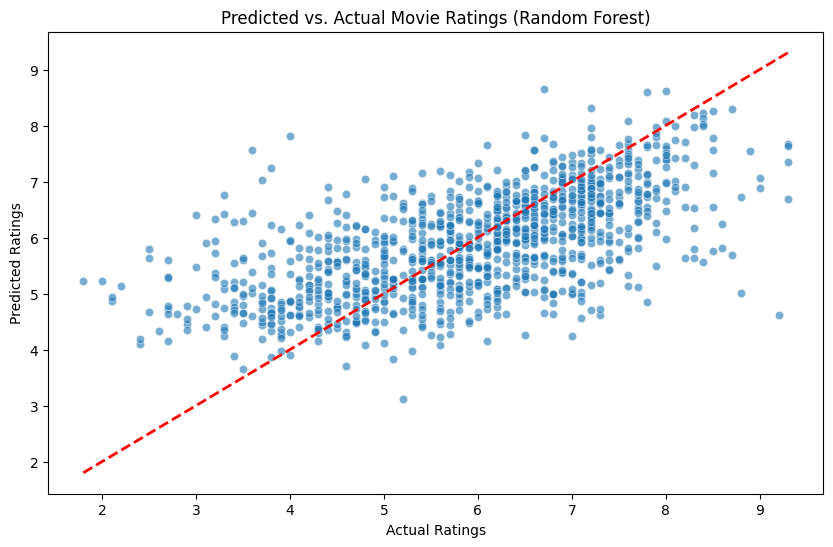

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.title('Predicted vs. Actual Movie Ratings (Random Forest)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()